In [1]:
import os
from pathlib import Path
import shutil

from postopus import Run
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

ModuleNotFoundError: No module named 'postopus'

# Benzene Example

## Run the simulation

In [2]:
example_dir = "examples/benzene"
# Path to some example data
path_to_octopus_output = Path(example_dir)

In [3]:
! cd {example_dir}  && octopus > out_gs.log 2>&1  # Run octopus with benzene example as input and log the output 
! cd {example_dir}  && head -n 20 out_gs.log  # Just to see the first 20 lines of the octopus output

    <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
                                ___
                             .-'   `'.
                            /         \
                            |         ;
                            |         |           ___.--,
                   _.._     |0) ~ (0) |    _.---'`__.-( (_.
            __.--'`_.. '.__.\    '--. \_.-' ,.--'`     `""`
           ( ,.--'`   ',__ /./;   ;, '.__.'`    __
           _`) )  .---.__.' / |   |\   \__..--""  """--.,_
          `---' .'.''-._.-'`_./  /\ '.  \ _.-~~~````~~~-._`-.__.'
                | |  .' _.-' |  |  \  \  '.               `~---`
                 \ \/ .'     \  \   '. '-._)
                  \/ /        \  \    `=.__`~-.
             jgs  / /\         `) )    / / `"".`\
            , _.-'.'\ \        / /    ( (     / /
             `--~`   ) )    .-'.'      '.'.  | (
                    (/`    ( (`          ) )  '-;
                     `      '-;         (-'



## Postopus project structure

In [4]:
# Instantiate Run object
run = Run(path_to_octopus_output)

In [5]:
run.default.scf.info

['\n',
 '******************************** Grid ********************************\n',
 'Simulation Box:\n',
 '  Type = minimum\n',
 '  Radius  [A] =   5.000\n',
 'Main mesh:\n',
 '  Spacing [A] = ( 0.150, 0.150, 0.150)    volume/point [A^3] =      0.00337\n',
 '  # inner mesh =     371891\n',
 '  # total mesh =     468887\n',
 '  Grid Cutoff [eV] =  1671.245006    Grid Cutoff [Ry] =   122.834253\n',
 '**********************************************************************\n',
 '\n',
 '\n',
 '***************************** Symmetries *****************************\n',
 'Symmetry elements : (i) 3*(C2) 3*(sigma)\n',
 'Symmetry group    : D2h\n',
 '**********************************************************************\n',
 '\n',
 '\n',
 '**************************** Theory Level ****************************\n',
 'Input: [TheoryLevel = kohn_sham]\n',
 '\n',
 'Exchange-correlation:\n',
 '  Exchange\n',
 '    Slater exchange (LDA)\n',
 '    [1] P. A. M. Dirac, Math. Proc. Cambridge Philos. Soc. 26

In [6]:
run.default.scf.convergence

energy   energy_diff      abs_dens      rel_dens    abs_ev  \
#iter                                                                   
1     -1026.51268  2.103340e-05  1.504780e-07  5.015940e-09  0.000017   
2     -1026.51268  1.570550e-07  4.430340e-08  1.476780e-09  0.000001   

             rel_ev  
#iter                
1      4.778220e-08  
2      2.946250e-09

In [ ]:
run.systems.keys()

dict_keys(['default'])

In [ ]:
run.default.system_data.keys()

dict_keys(['scf', 'td'])

In [7]:
run.default.scf.forces

species       total_x   total_y       total_z     ion-ion_x  ion-ion_y  \
index                                                                          
1           C  4.513520e-12 -0.879967  4.402890e-13  0.000000e+00   180.2840   
2           C -7.522730e-01 -0.431963  4.220630e-13  1.561740e+02    90.1459   
3           C -7.522730e-01  0.431963  4.300750e-13  1.561740e+02   -90.1459   
4           C -1.612670e-12  0.879967  4.218610e-13 -2.854500e-15  -180.2840   
5           C  7.522730e-01  0.431963  4.530260e-13 -1.561740e+02   -90.1459   
6           C  7.522730e-01 -0.431963  4.516360e-13 -1.561740e+02    90.1459   
7           H  3.020570e-14  0.283884  8.764570e-14  0.000000e+00    87.1121   
8           H  2.376930e-01  0.135078  8.609140e-14  7.540110e+01    43.5529   
9           H  2.376930e-01 -0.135078  7.715150e-14  7.540110e+01   -43.5529   
10          H  1.483990e-12 -0.283884  8.454550e-14  8.920310e-17   -87.1121   
11          H -2.376930e-01 -0.135078  8.273040e-14 -7.540110e+01   -43.5529   
12          H -2.376930e-01  0.135078  8.611220e-14 -7.540110e+01    43.5529   

       ion-ion_z  vdw_x  vdw_y  vdw_z  ...  hubbard_z         scf_x  \
index                                  ...                            
1            0.0    0.0    0.0    0.0  ...        0.0  1.222330e-12   
2            0.0    0.0    0.0    0.0  ...        0.0 -4.285330e-07   
3            0.0    0.0    0.0    0.0  ...        0.0 -4.285330e-07   
4            0.0    0.0    0.0    0.0  ...        0.0  1.061810e-12   
5            0.0    0.0    0.0    0.0  ...        0.0  4.285340e-07   
6            0.0    0.0    0.0    0.0  ...        0.0  4.285330e-07   
7            0.0    0.0    0.0    0.0  ...        0.0  9.293620e-14   
8            0.0    0.0    0.0    0.0  ...        0.0 -5.564550e-08   
9            0.0    0.0    0.0    0.0  ...        0.0 -5.564550e-08   
10           0.0    0.0    0.0    0.0  ...        0.0  7.641220e-14   
11           0.0    0.0    0.0    0.0  ...        0.0  5.564520e-08   
12           0.0    0.0    0.0    0.0  ...        0.0  5.564520e-08   

              scf_y         scf_z  nlcc_x  nlcc_y  nlcc_z  phot_x  phot_y  \
index                                                                       
1     -1.963620e-07  8.860030e-15     0.0     0.0     0.0     0.0     0.0   
2      1.910400e-08  1.737320e-14     0.0     0.0     0.0     0.0     0.0   
3     -1.910440e-08  8.882950e-15     0.0     0.0     0.0     0.0     0.0   
4      1.963620e-07 -4.507970e-15     0.0     0.0     0.0     0.0     0.0   
5     -1.910560e-08  4.671840e-15     0.0     0.0     0.0     0.0     0.0   
6      1.910500e-08  4.697790e-15     0.0     0.0     0.0     0.0     0.0   
7     -1.403100e-07  2.517120e-15     0.0     0.0     0.0     0.0     0.0   
8     -1.170320e-08  2.350960e-15     0.0     0.0     0.0     0.0     0.0   
9      1.170320e-08 -9.975170e-16     0.0     0.0     0.0     0.0     0.0   
10     1.403110e-07 -1.508340e-15     0.0     0.0     0.0     0.0     0.0   
11     1.170290e-08 -1.240510e-15     0.0     0.0     0.0     0.0     0.0   
12    -1.170290e-08  4.640230e-15     0.0     0.0     0.0     0.0     0.0   

       phot_z  
index          
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10        0.0  
11        0.0  
12        0.0  

[12 rows x 31 columns]

## Working with x-array

In [8]:
# ask postopus for the x-array representation of the data
density = run.default.scf.density
xa = density.get_converged(
    source="cube"
)  # the converged field from the "static" folder is loaded.
xa

<xarray.DataArray 'density' (step: 1, x: 95, y: 99, z: 67)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
...
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])
Coordinates:
  * x        (x) float64 -7.05 -6.9 -6.75 -6.6 -6.45 ... 6.45 6.6 6.75 6.9 7.05
  * y        (y) float64 -7.35 -7.2 -7.05 -6.9 -6.75 ... 6.75 6.9 7.05 7.2 7.35
  * z        (z) float64 -4.95 -4.8 -4.65 -4.5 -4.35 ... 4.35 4.5 4.65 4.8 4.95
  * step     (step) int64 1

In [9]:
xa.coords

Coordinates:
  * x        (x) float64 -7.05 -6.9 -6.75 -6.6 -6.45 ... 6.45 6.6 6.75 6.9 7.05
  * y        (y) float64 -7.35 -7.2 -7.05 -6.9 -6.75 ... 6.75 6.9 7.05 7.2 7.35
  * z        (z) float64 -4.95 -4.8 -4.65 -4.5 -4.35 ... 4.35 4.5 4.65 4.8 4.95
  * step     (step) int64 1

In [10]:
xa.values.shape

(1, 95, 99, 67)

### Selecting a slice by index and visualizing it

In [11]:
s0 = xa.isel(z=33)  # Explain 67 / 2
s0

<xarray.DataArray 'density' (step: 1, x: 95, y: 99)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * x        (x) float64 -7.05 -6.9 -6.75 -6.6 -6.45 ... 6.45 6.6 6.75 6.9 7.05
  * y        (y) float64 -7.35 -7.2 -7.05 -6.9 -6.75 ... 6.75 6.9 7.05 7.2 7.35
    z        float64 1.588e-06
  * step     (step) int64 1

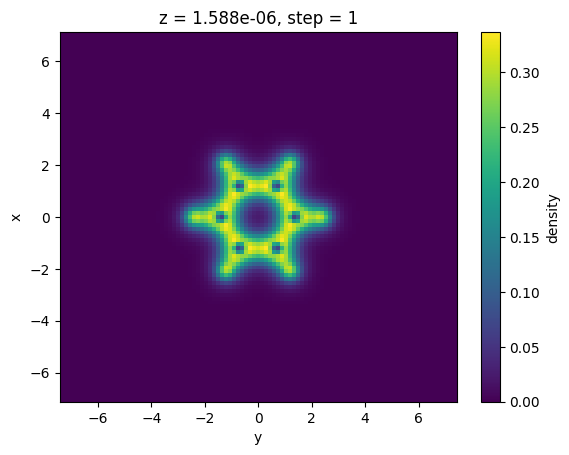

In [12]:
s0.plot()  ## Add a note about s0.plot(x="x")

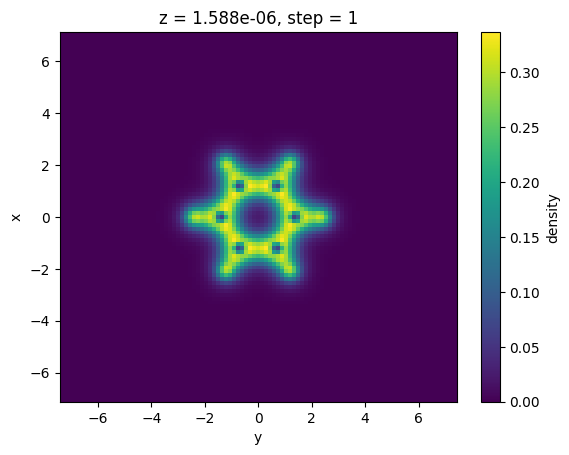

In [13]:
s1 = xa.sel(
    z=0, method="nearest"
)  # Slicing by coordinate ##is xa = xa.squeeze() required ?
s1.plot()

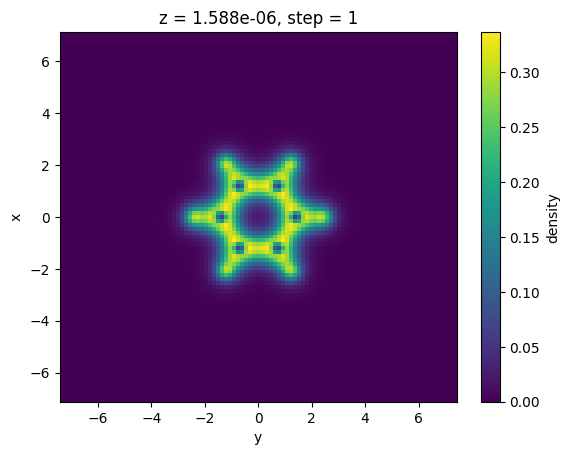

In [14]:
## Should I include this?
xa2 = xa.squeeze()
s2 = xa2.sel(z=0, method="nearest")
s2.plot.imshow()

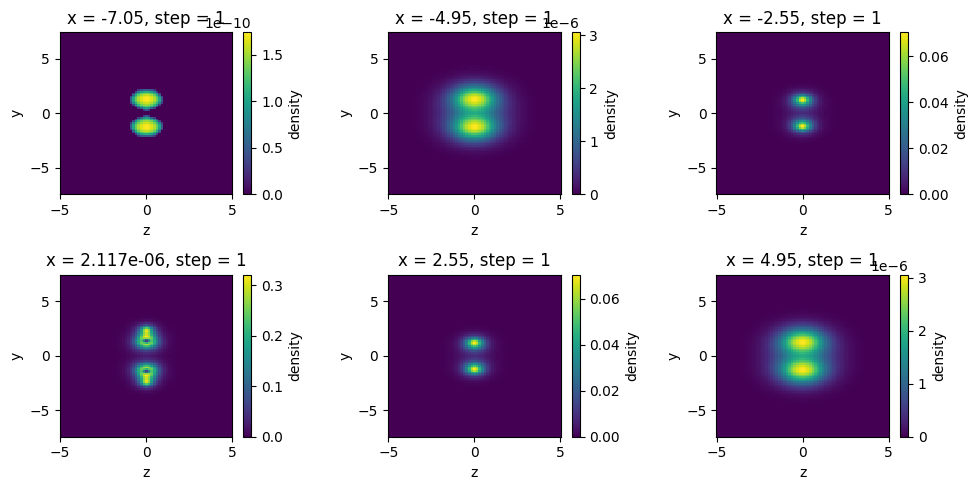

In [15]:
# plot 6 2D slice of the density along the x axis

fig, axs = plt.subplots(2, 3, figsize=(10, 5))
x_positions = np.arange(-7.5, 7.5, 2.5)
for ax, x in zip(axs.flat, x_positions):
    xa2.sel(x=x, method="nearest").plot.imshow(ax=ax)
fig.tight_layout()  # To avoid overall of labels

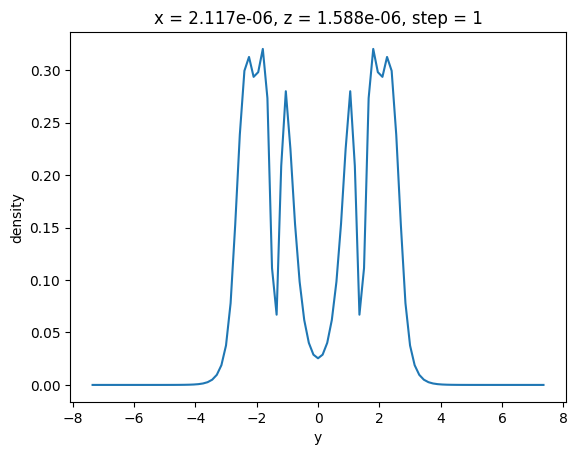

In [16]:
xa.sel(z=0, x=0, method="nearest").plot()  ## talk about the retention of metadata

## Plotting Holoviews

In [ ]:
import holoviews as hv
from holoviews import opts  # For setting defaults
hv.extension('bokeh', 'matplotlib')  # Allow for interactive plots
#hv.extension('matplotlib')  # Allow for interactive plots

In [17]:
hv.Dataset(xa).to(hv.Image, kdims=["x", "y"], dynamic=True)

:DynamicMap   [z,step]
   :Image   [x,y]   (density)

In [18]:
hv.Dataset(xa).to(hv.Image, kdims=["y", "z"], dynamic=True)

:DynamicMap   [x,step]
   :Image   [y,z]   (density)

In [19]:
plot = hv.Dataset(xa).to(hv.Image, kdims=["y", "x"])

In [20]:
plot.grid("z")

:GridSpace   [z]
   :HoloMap   [step]
      :Image   [y,x]   (density)

# Methane Example

In [21]:
example_dir = "examples/methane"
# Path to some example data
path_to_octopus_output = Path(example_dir)

In [22]:
# first run ground state calculations by
# copying the inp from example_di/calculation_gs to example_dir and run octopus
shutil.copyfile(
    os.path.join(example_dir, "calculation_gs", "inp"),
    os.path.join(example_dir, "inp")
)
! cd {example_dir}  && octopus > out_gs.log 2>&1 
! cd {example_dir}  && head -n 20 out_gs.log  # Just to see the first 20 lines of the octopus output

    <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
                                ___
                             .-'   `'.
                            /         \
                            |         ;
                            |         |           ___.--,
                   _.._     |0) ~ (0) |    _.---'`__.-( (_.
            __.--'`_.. '.__.\    '--. \_.-' ,.--'`     `""`
           ( ,.--'`   ',__ /./;   ;, '.__.'`    __
           _`) )  .---.__.' / |   |\   \__..--""  """--.,_
          `---' .'.''-._.-'`_./  /\ '.  \ _.-~~~````~~~-._`-.__.'
                | |  .' _.-' |  |  \  \  '.               `~---`
                 \ \/ .'     \  \   '. '-._)
                  \/ /        \  \    `=.__`~-.
             jgs  / /\         `) )    / / `"".`\
            , _.-'.'\ \        / /    ( (     / /
             `--~`   ) )    .-'.'      '.'.  | (
                    (/`    ( (`          ) )  '-;
                     `      '-;         (-'



In [23]:
# then run the td calculations by
# copying the inp from example_di/calculation_td to example_dir and run octopus
shutil.copyfile(
    os.path.join(example_dir, "calculation_td", "inp"),
    os.path.join(example_dir, "inp")
)

! cd {example_dir}  && octopus > out_td.log  2>&1
! cd {example_dir}  && head -n 20 out_td.log # Just to see the first 20 lines of the octopus output

    <><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
                                ___
                             .-'   `'.
                            /         \
                            |         ;
                            |         |           ___.--,
                   _.._     |0) ~ (0) |    _.---'`__.-( (_.
            __.--'`_.. '.__.\    '--. \_.-' ,.--'`     `""`
           ( ,.--'`   ',__ /./;   ;, '.__.'`    __
           _`) )  .---.__.' / |   |\   \__..--""  """--.,_
          `---' .'.''-._.-'`_./  /\ '.  \ _.-~~~````~~~-._`-.__.'
                | |  .' _.-' |  |  \  \  '.               `~---`
                 \ \/ .'     \  \   '. '-._)
                  \/ /        \  \    `=.__`~-.
             jgs  / /\         `) )    / / `"".`\
            , _.-'.'\ \        / /    ( (     / /
             `--~`   ) )    .-'.'      '.'.  | (
                    (/`    ( (`          ) )  '-;
                     `      '-;         (-'



In [24]:
# Instantiate Run object
run = Run(path_to_octopus_output)

In [27]:
density = run.default.scf.density
xa = density.get_converged(source="ncdf")

In [28]:
xa.coords

Coordinates:
  * x        (x) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * y        (y) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * z        (z) float64 -7.483 -7.143 -6.803 -6.463 ... 6.463 6.803 7.143 7.483
  * step     (step) int64 17

In [29]:
xa.values.shape

(1, 45, 45, 45)

In [30]:
s0 = xa.isel(z=22)

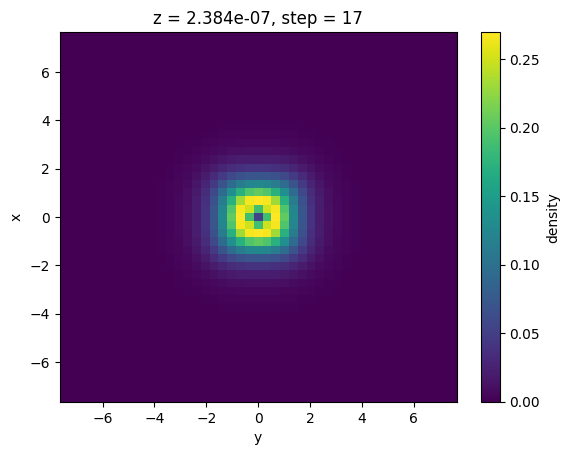

In [31]:
s0.plot()